# Section 5 of the Paper (these figures are plotted in the supplementary materials).

### Here, we use a part of the Mnist dataset after its transformation into functional data.

### The notebook is organized as follows : we import libraries and the dataset; we build datasets described in the paper and then applied Multivariate Functional Isolation Forest.

# ***Computational time is low, you can run the entire notebook (approximatively 5 min)***.

## Importing libraries :

In [1]:
from MFIF import *
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
from sklearn import svm

## Importing a part of the Mnist dataset after a functional data transformation :

In [2]:
X = pd.read_csv('MNIST.csv', header = None)
X_mat = X.as_matrix()


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


## Transforming data from csv into Array-like (samples,dimension, discretization) 

In [3]:
X_transform = np.zeros((X_mat.shape[0],2,100))
X_transform[:,0,:] = X_mat[:,:100]
X_transform[:,1,:] = X_mat[:,100:200]
y_label = X_mat[:,200]

## Constructing dataset for anomaly detection and classification described in the paper :

In [4]:
a = np.where(y_label == 1)[0]
b = np.where(y_label == 5)[0]
c = np.where(y_label == 7)[0]
d = np.where(y_label == 2)[0] 
e = np.where(y_label == 3)[0] 
f = np.where(y_label == 6)[0]
g = np.where(y_label == 4)[0]
h = np.where(y_label == 0)[0]

#######
# Deleting digits which got a wrong pre-coding (the time vector is reversed):
#######

mauvais_un = np.where(X_transform[a,0,0] <0.7 )[0]
z = np.where(X_transform[a,0,0] >0.7 )[0]
bon_un = a[z]
mauvais_cinq = np.where(X_transform[b,0,0] >0.3 )[0]
zz = np.where(X_transform[b,0,0] <0.3 )[0]
bon_cinq = b[zz]
c = np.delete(c, obj = np.array([24,85,95]))
d = np.delete(d, obj = np.array([8]))


bon_nombre = np.concatenate((bon_un,bon_cinq,c))
X_transform_2 = X_transform[bon_nombre,:,:]
y_label_2 = y_label[bon_nombre]

a2 = np.where(y_label_2 == 1)[0]
b2 = np.where(y_label_2 == 5)[0]
c2 = np.where(y_label_2 == 7)[0]


##### For the Anomaly detection :
z_AD = np.concatenate((c[:100],b2[:10],a2[:10]))
X_AD = X_transform_2[z_AD]
y_AD = y_label_2[z_AD]

z_AD2 = np.concatenate((c[:100],d[:10]))
X_AD2 = X_transform[z_AD2]
y_AD2 = y_label[z_AD2]

##### For the classification :
z_classif_train = np.concatenate((a2[:100],c2[:100],b2[:100]))
X_classif_train = X_transform_2[z_classif_train]
y_classif_train = y_label_2[z_classif_train]

z_classif_test = np.concatenate((a2[100:200],c2[100:200],b2[100:200]))
X_classif_test= X_transform_2[z_classif_test]
y_classif_test= y_label_2[z_classif_test]



# Anomaly detection :

### Anomaly detection with seven (normal class) and two (anomalies) :

In [5]:
np.random.seed(42)
time = np.linspace(0,1,X_AD2.shape[2])
MFF = MFIForest(X_AD2,time=time,ntrees = 100,subsample_size = 64,
                D = 'SinusCosinus', Dsize = 1000, innerproduct='auto1', alpha = 1)
SS = MFF.compute_paths()

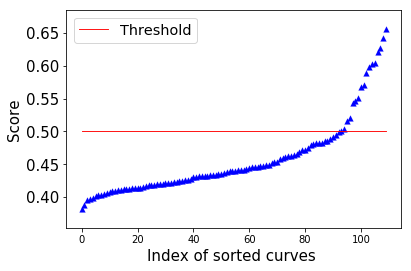

In [6]:
plt.figure(figsize=(6,4))
plt.scatter(np.arange(len(SS)),np.sort(SS), c='b',marker = '^', linewidth=0.1)
plt.plot(np.arange(len(SS)), 0.50 *np.ones((len(SS))), c='r',linewidth=0.9, label = 'Threshold')
plt.xlabel('Index of sorted curves ', size = 15)
plt.ylabel('Score', size = 15)
plt.legend(fontsize= "x-large")
plt.yticks(fontsize = 15)
plt.show()

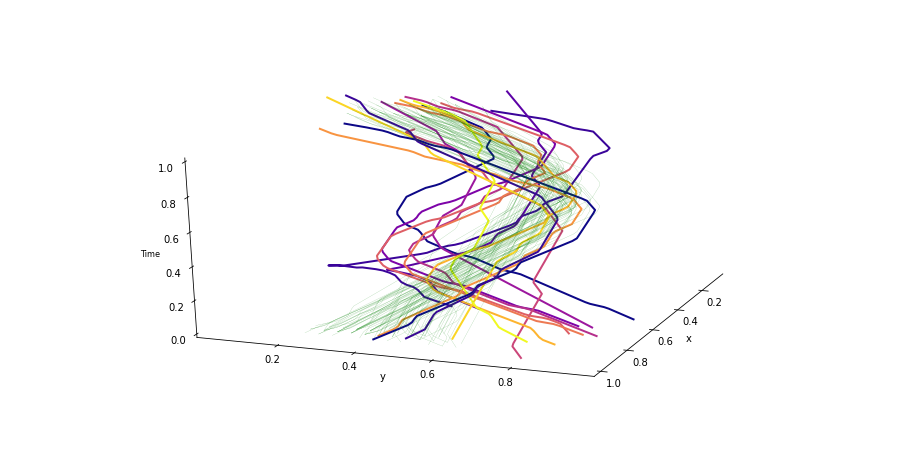

In [7]:
colors1 = [ matplotlib.cm.viridis_r(x)
            for x in np.linspace(0.3, 0.3, len(SS)-13) ]
colors2 = [ matplotlib.cm.plasma_r(x)
            for x in np.linspace(0, 1, 13) ]

time = np.linspace(0,1,100)
fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')

for j in range(X_AD2.shape[0]):
    if (j <15):
        ax.plot(X_AD2[np.argsort(SS)[X_AD2.shape[0]-1-j],0,:],
                X_AD2[np.argsort(SS)[X_AD2.shape[0]-1-j],1,:],time, 
               c=colors2[12-j], linewidth =2)
    else:
        ax.plot(X_AD2[np.argsort(SS)[X_AD2.shape[0]-1-j],0,:],
                X_AD2[np.argsort(SS)[X_AD2.shape[0]-1-j],1,:],time,
                linestyle = '-',c='g', linewidth = 0.1)

        

ax.view_init(elev=30., azim=20)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Time', size = 8)


ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')


ax.grid(False)


ax.dist = 12


plt.show()

In [8]:
np.argsort(SS)

array([ 18,  13,  49,   6,  88,  54,  68,  82,  17,  16,   7,  97,   2,
        89,  21,  22,  93,  25,  99,  14,  43,  92,  15,  87,  91,  38,
        31,  23,  20,  98,  27,  60,  37,  76,  78,  19,  77,  96,  56,
        74,  42,  52,  34,  75,  85,  81,  47,  71,  46,  35,  79,   3,
        64,  57,  70,  59,  45,  50,  95,  51,  94,   9,  62,  55,  53,
        44,  48,   0,  69,  28,  65,  30,  36,  63,  41,   1,  24,  61,
        72,  10,   8,  39,  73,  26,   4,  12,  11,  40,  80,  86,   5,
        32,  58,  33,  66,  29,  83, 107,  84, 101,  67, 102, 100,  90,
       106, 108, 105, 109, 104, 103])

In [9]:
liste = [29,83,107,84,101,67,102,100,90,106,108,105,109,104,103]

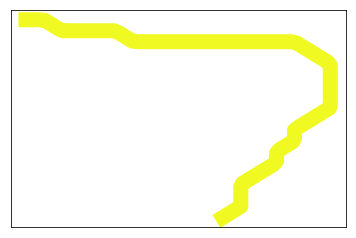

In [10]:
plt.figure(figsize=(6,4))
colors2 = [ matplotlib.cm.plasma_r(x)
            for x in np.linspace(0, 1, 15) ]
plt.plot(X_AD2[liste[0],1,:],1-X_AD2[liste[0],0,:], c =colors2[0], linewidth = 15)

plt.xticks([])
plt.yticks([])
plt.show()

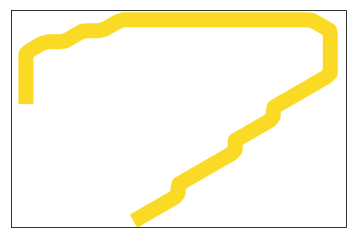

In [11]:
plt.figure(figsize=(6,4))
plt.plot(X_AD2[liste[1],1,:],1-X_AD2[liste[1],0,:], c =colors2[1], linewidth = 15)
plt.xticks([])
plt.yticks([])
plt.show()

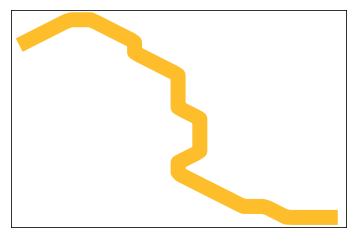

In [12]:
plt.figure(figsize=(6,4))
plt.plot(X_AD2[liste[2],1,:],1-X_AD2[liste[2],0,:], c =colors2[2], linewidth = 15)
plt.xticks([])
plt.yticks([])
plt.show()

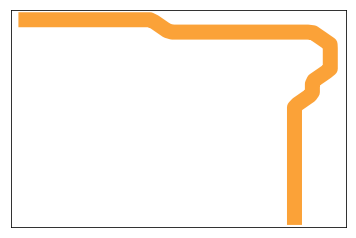

In [13]:
plt.figure(figsize=(6,4))
plt.plot(X_AD2[liste[3],1,:],1-X_AD2[liste[3],0,:], c =colors2[3], linewidth = 15)
plt.xticks([])
plt.yticks([])
plt.show()

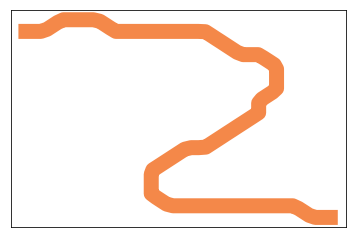

In [14]:
plt.figure(figsize=(6,4))
plt.plot(X_AD2[liste[4],1,:],1-X_AD2[liste[4],0,:], c =colors2[4], linewidth = 15)
plt.xticks([])
plt.yticks([])
plt.show()

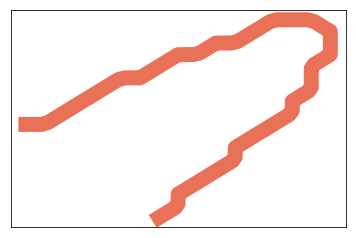

In [15]:
plt.figure(figsize=(6,4))
plt.plot(X_AD2[liste[5],1,:],1-X_AD2[liste[5],0,:], c =colors2[5], linewidth = 15)
plt.xticks([])
plt.yticks([])
plt.show()

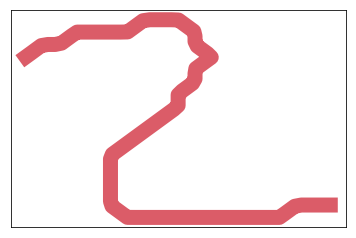

In [16]:
plt.figure(figsize=(6,4))
plt.plot(X_AD2[liste[6],1,:],1-X_AD2[liste[6],0,:], c =colors2[6], linewidth = 15)
plt.xticks([])
plt.yticks([])
plt.show()

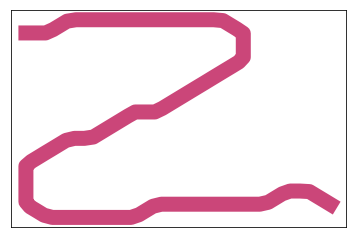

In [17]:
plt.figure(figsize=(6,4))
plt.plot(X_AD2[liste[7],1,:],1-X_AD2[liste[7],0,:], c =colors2[7], linewidth = 15)
plt.xticks([])
plt.yticks([])
plt.show()

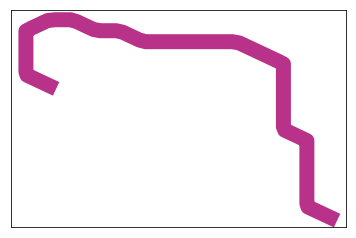

In [18]:
plt.figure(figsize=(6,4))
plt.plot(X_AD2[liste[8],1,:],1-X_AD2[liste[8],0,:], c =colors2[8], linewidth = 15)
plt.xticks([])
plt.yticks([])
plt.show()

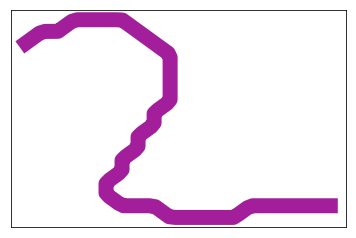

In [19]:
plt.figure(figsize=(6,4))
plt.plot(X_AD2[liste[9],1,:],1-X_AD2[liste[9],0,:], c =colors2[9], linewidth = 15)
plt.xticks([])
plt.yticks([])
plt.show()

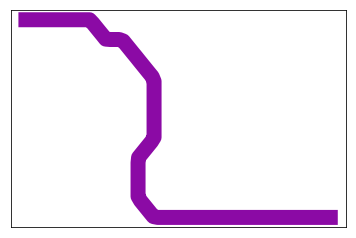

In [20]:
plt.figure(figsize=(6,4))
plt.plot(X_AD2[liste[10],1,:],1-X_AD2[liste[10],0,:], c =colors2[10], linewidth = 15)
plt.xticks([])
plt.yticks([])
plt.show()

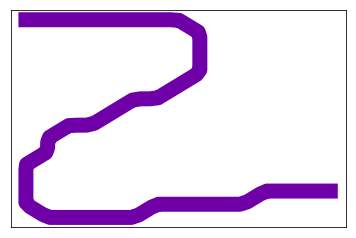

In [21]:
plt.figure(figsize=(6,4))
plt.plot(X_AD2[liste[11],1,:],1-X_AD2[liste[11],0,:], c =colors2[11], linewidth = 15)
plt.xticks([])
plt.yticks([])
plt.show()

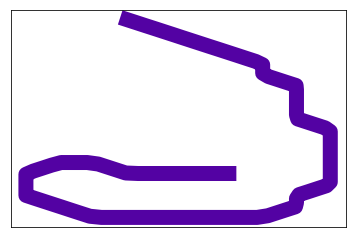

In [22]:
plt.figure(figsize=(6,4))
plt.plot(X_AD2[liste[12],1,:],1-X_AD2[liste[12],0,:], c =colors2[12], linewidth = 15)
plt.xticks([])
plt.yticks([])
plt.show()

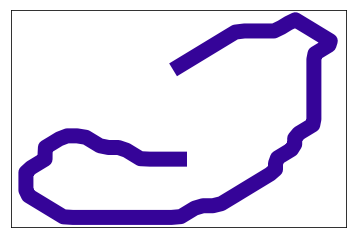

In [23]:
plt.figure(figsize=(6,4))
plt.plot(X_AD2[liste[13],1,:],1-X_AD2[liste[13],0,:], c =colors2[13], linewidth = 15)
plt.xticks([])
plt.yticks([])
plt.show()

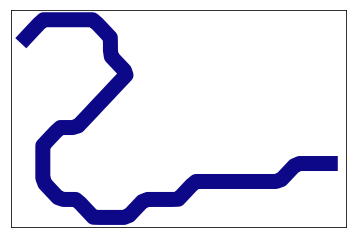

In [24]:
plt.figure(figsize=(6,4))
plt.plot(X_AD2[liste[14],1,:],1-X_AD2[liste[14],0,:], c =colors2[14], linewidth = 15)
plt.xticks([])
plt.yticks([])
plt.show()

# Classification with DD-plot :

### Fitting the model on training data using Multivariate FIF :

In [25]:
time = np.linspace(0,1,100)
np.random.seed(42)
MF1 = MFIForest(X_classif_train[:100],time=time,ntrees = 100, subsample_size= 64,
                D = 'Brownian', Dsize = 100, innerproduct='auto1', alpha=0)
S1 = MF1.compute_paths(X_classif_train)
MF2 = MFIForest(X_classif_train[100:200],time=time,ntrees = 100, subsample_size= 64,
                D = 'Brownian', Dsize = 100, innerproduct='auto1', alpha=0)
S2 = MF2.compute_paths(X_classif_train)
MF3 = MFIForest(X_classif_train[200:],time=time,ntrees = 100, subsample_size= 64,
                D = 'Brownian', Dsize = 100, innerproduct='auto1', alpha=0)
S3 = MF3.compute_paths(X_classif_train)


S1_test = MF1.compute_paths(X_classif_test)
S2_test = MF2.compute_paths(X_classif_test)
S3_test = MF3.compute_paths(X_classif_test)

### Classification with multi-class SVM :

In [26]:
np.random.seed(42)
Z_train = np.concatenate((S1.reshape(-1,1),S2.reshape(-1,1),S3.reshape(-1,1)), axis = 1)
Z_test = np.concatenate((S1_test.reshape(-1,1),S2_test.reshape(-1,1),S3_test.reshape(-1,1)), axis = 1)
clf = svm.SVC(decision_function_shape='ova', kernel = 'linear', gamma = 'scale')
clf.fit(Z_train, y_classif_train) 
a = clf.predict(Z_test)

# Correct Classification Rates in the paper 
#(There is a typo in the paper, CCR is 0.99 not 0.98 as you can see):

CCR = np.sum((a == y_classif_test)*1.) / y_classif_test.shape
print(CCR)

[0.99333333]


### Plotting the results :

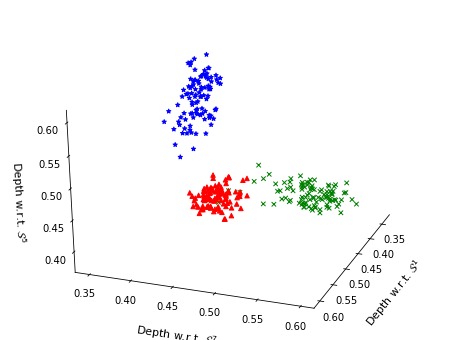

In [27]:
S11 = 1-S1
S22 = 1-S2
S33 = 1-S3

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(S11[:100], S22[:100], S33[:100], c='r', marker='^',linewidth = 1, alpha = 1)
ax.scatter(S11[100:200], S22[100:200], S33[100:200], c='g', marker='x',linewidth = 1, alpha = 1)
ax.scatter(S11[200:], S22[200:], S33[200:], c='b', marker='*',linewidth = 1, alpha = 1)


ax.view_init(elev=30., azim=20)



ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')


ax.grid(False)


ax.dist = 10


ax.set_xlabel('Depth w.r.t. $\mathcal{S}^{1}$', size = 11, labelpad = 15)
ax.set_ylabel('Depth w.r.t. $\mathcal{S}^{7}$', size = 11, labelpad = 15)
ax.set_zlabel('Depth w.r.t. $\mathcal{S}^{5}$', size = 11, labelpad = 10)
plt.show()